## Variation in spectrum of the Jacoabian of consensus dynamics

We consider the system:

$$\dot{\mathbf{x}} = -D\mathbf{x} + A\mathbf{S}(\mathbf{x}, u); \quad \mathbf{x} \in \mathbb{R}^N, \mathbf{S}:\mathbb{R}^N \times \mathbb{R} \rightarrow \mathbb{R}^N,$$

where $\mathbf{S}(\mathbf{x}, u) := (S(x_i,u))_{i=1,\dots,N}, S:\mathbb{R}^2 \rightarrow \mathbb{R}$.

To analyse stability of the fixed point at the origin, the Jacobian of the above system is:
$$J := -D + kA,$$
where $k := \partial_xS(0,0)$.

In [1]:
%run ../imports.py

In [2]:
import matplotlib.pyplot as plt

In [3]:
N = 4
g = get_strongly_connected_digraph(N)

In [4]:
node_list = np.arange(0,N)

In [5]:
A = nx.adjacency_matrix(g, nodelist = node_list)
D = np.diag(np.asarray(np.sum(A, axis=1)).reshape(-1))
L = D-A

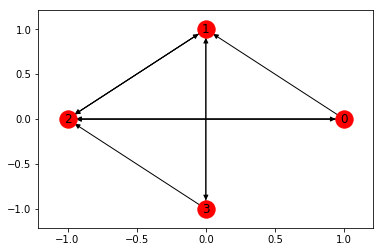

In [6]:
nx.draw_networkx(g, pos = nx.circular_layout(g))

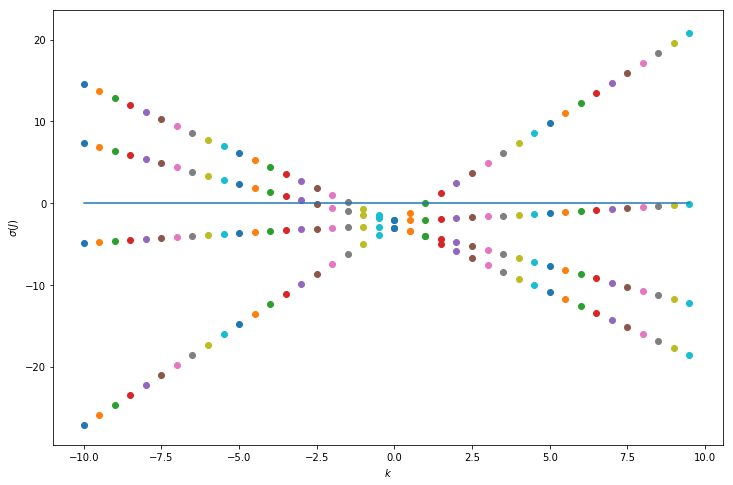

In [7]:
plt.figure(figsize=(12,8))
for k in np.arange(-10,10,0.5):
    val, vec = np.linalg.eig(-D+k*A)
    plt.scatter(np.repeat(k,N),np.real(val))
plt.xlabel(r'$k$')
plt.ylabel(r'$\sigma(J)$')
plt.plot(np.arange(-10,10,0.5),np.repeat(0,40))